# 02. Multiple Parameter

In this tutorial, you will learn how to:

* Optimize the Objective Function with Multiple HyperParameters
* Define different types of Search Space

在本教程中，您将学习如何：

* 优化多超参数的目标函数
* 定义不同类型的搜索空间

In [1]:
# import fmin interface from UltraOpt
from ultraopt import fmin
# hdl2cs can convert HDL(Hyperparams Describe Language) to CS(Config Space)
from ultraopt.hdl import hdl2cs
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline

Declares a objective function to optimize. Unlike last time, we will optimize the function with two Hyperparameters, $x$ and $y$.

声明要优化的目标函数。与上次不同，我们将使用两个超参数$x$和$y$来优化函数。

$$ z = sin\sqrt{x^2 + y^2} $$

In [2]:
def evaluate(config:dict):
    x, y = config['x'], config['y']
    return np.sin(np.sqrt(x**2 + y**2))

Just like last time, let's try visualizing it. But unlike last time, there are two Hyperparameters, so we need to visualize them in 3D space.

就像上次一样，我们尝试对其进行可视化。但与上次不同的是，这次有两个超参数，所以我们需要在三维空间中可视化它们。

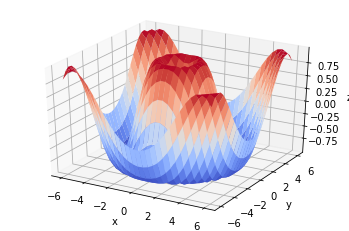

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(x, y)

z = evaluate({'x': x, 'y': y})

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Likewise, let's define the search space. However, this time, you need to define two search spaces($x, y$), so you put each of them in the `dict` type **config** parameter. The return value **loss** more smaller, the **config** more better.

同样，让我们定义搜索空间。但这次，您需要定义两个超参数$(x,y)$，因此将它们分别放在`dict` type 的 **config** 参数中。返回值 **损失(loss)** 越小， **配置(config)** 越好。

重复 `BasicTutorial` 的步骤，让我们定义HDL $\rightarrow$ 转为CS $\rightarrow$ 采样config $\rightarrow$ 评价config

In [4]:
HDL = {
    "x": {"_type": "uniform", "_value": [-6, 6]},
    "y": {"_type": "uniform", "_value": [-6, 6]},
}

In [5]:
CS = hdl2cs(HDL)
CS

Configuration space object:
  Hyperparameters:
    x, Type: UniformFloat, Range: [-6.0, 6.0], Default: 0.0
    y, Type: UniformFloat, Range: [-6.0, 6.0], Default: 0.0

In [6]:
configs = [config.get_dictionary() for config in CS.sample_configuration(5)]
configs

[{'x': -5.593893899588723, 'y': 3.905935850476297},
 {'x': 1.7256570407081426, 'y': 4.3951075294203505},
 {'x': 5.011134022974652, 'y': 0.00020610643674157103},
 {'x': 2.0353817349732086, 'y': -5.024138434419903},
 {'x': 4.775298188429398, 'y': -0.9660805690189331}]

In [7]:
losses = [evaluate(config) for config in configs]
best_ix = np.argmin(losses)
print(f"optimal config: {configs[best_ix]}, \noptimal loss: {losses[best_ix]}")

optimal config: {'x': 1.7256570407081426, 'y': 4.3951075294203505}, 
optimal loss: -0.9999562460698792


很好，让我们用UltraOpt来对评价函数进行优化吧！

In [27]:
result = fmin(
    eval_func=evaluate, # 评价函数
    config_space=HDL,   # 配置空间
    optimizer="ETPE", # 优化器
    n_iterations=100    #  迭代数
)

100%|██████████| 100/100 [00:01<00:00, 52.77trial/s, best loss: -43.363]


In [28]:
result

+---------------------------------+
| HyperParameters | Optimal Value |
+-----------------+---------------+
| hp_choice       | pear          |
| hp_int_quniform | 10            |
| hp_int_uniform  | 9             |
| hp_loguniform   | 0.2459        |
| hp_ordinal      | University    |
| hp_qloguniform  | 100.0000      |
| hp_quniform     | 0.0000        |
| hp_uniform      | 100.0000      |
+-----------------+---------------+
| Optimal Loss    | -43.3633      |
+-----------------+---------------+
| Num Configs     | 100           |
+-----------------+---------------+

查看优化过程的拟合曲线：

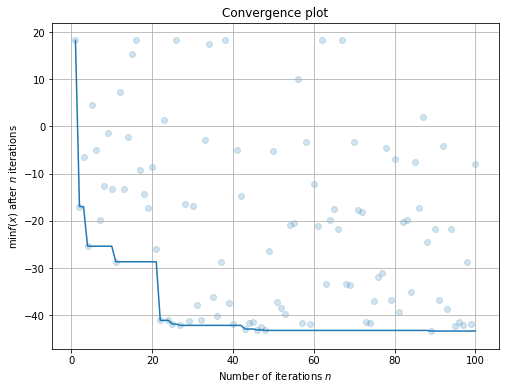

In [29]:
plt.rcParams['figure.figsize'] = (8, 6)
result.plot_convergence();

## Define different types of Search Space

|超参变量类型(`_type`)|参数列表(`_value`)|举例|描述|
|----|----|----|----|
| "choice" | options |`["苹果","梨子","葡萄"]`|选项(options)之间没有可比较关系|
| "ordinal" | sequence |`["小学","中学","大学"]`|序列(sequence)之间存在可比较关系|
| "uniform" | [low, high] |`[0, 100]`|均匀分布|
| "quniform" | [low, high, q] |`[0, 100, 20]`|间隔为 `q` 的离散均匀分布|
| "loguniform" | [low, high] | `[0.1, 100]`| `log` 缩放的均匀分布|
| "qloguniform" | [low, high, q] | `[1, 100, 1]`| `log` 缩放的离散均匀分布|
| "int_uniform" | [low, high] | `[0, 10]`| 间隔为 `1` 的离散均匀分布， `int`类型|
| "int_quniform" | [low, high, q] |`[0, 10, 2]`| 间隔为 `q` 的离散均匀分布， `int`类型|

In [10]:
HDL = {
    "hp_choice": {"_type": "choice", "_value": ["apple", "pear", "grape"]},
    "hp_ordinal": {"_type": "ordinal", "_value": ["Primary school", "Middle school", "University"] },
    "hp_uniform": {"_type": "uniform", "_value": [0, 100]},
    "hp_quniform": {"_type": "quniform", "_value": [0, 100, 20]},
    "hp_loguniform": {"_type": "loguniform", "_value": [0.1, 100]},
    "hp_qloguniform": {"_type": "qloguniform", "_value": [10, 100, 10]},
    "hp_int_uniform": {"_type": "int_uniform", "_value": [0, 10]},
    "hp_int_quniform": {"_type": "int_quniform", "_value": [0, 10, 2]},
}

In [11]:
CS = hdl2cs(HDL)
CS

Configuration space object:
  Hyperparameters:
    hp_choice, Type: Categorical, Choices: {apple, pear, grape}, Default: apple
    hp_int_quniform, Type: UniformInteger, Range: [0, 10], Default: 5, Q: 2
    hp_int_uniform, Type: UniformInteger, Range: [0, 10], Default: 5
    hp_loguniform, Type: UniformFloat, Range: [0.1, 100.0], Default: 3.1622776602, on log-scale
    hp_ordinal, Type: Ordinal, Sequence: {Primary school, Middle school, University}, Default: Primary school
    hp_qloguniform, Type: UniformFloat, Range: [10.0, 100.0], Default: 31.6227766017, on log-scale, Q: 10.0
    hp_quniform, Type: UniformFloat, Range: [0.0, 100.0], Default: 50.0, Q: 20.0
    hp_uniform, Type: UniformFloat, Range: [0.0, 100.0], Default: 50.0

In [12]:
configs = [config.get_dictionary() for config in CS.sample_configuration(1000)]
variables = {key:[config[key] for config in configs] for key in HDL}
hp_choice_cnt = Counter(variables["hp_choice"])
hp_ordinal_cnt = Counter(variables["hp_ordinal"])

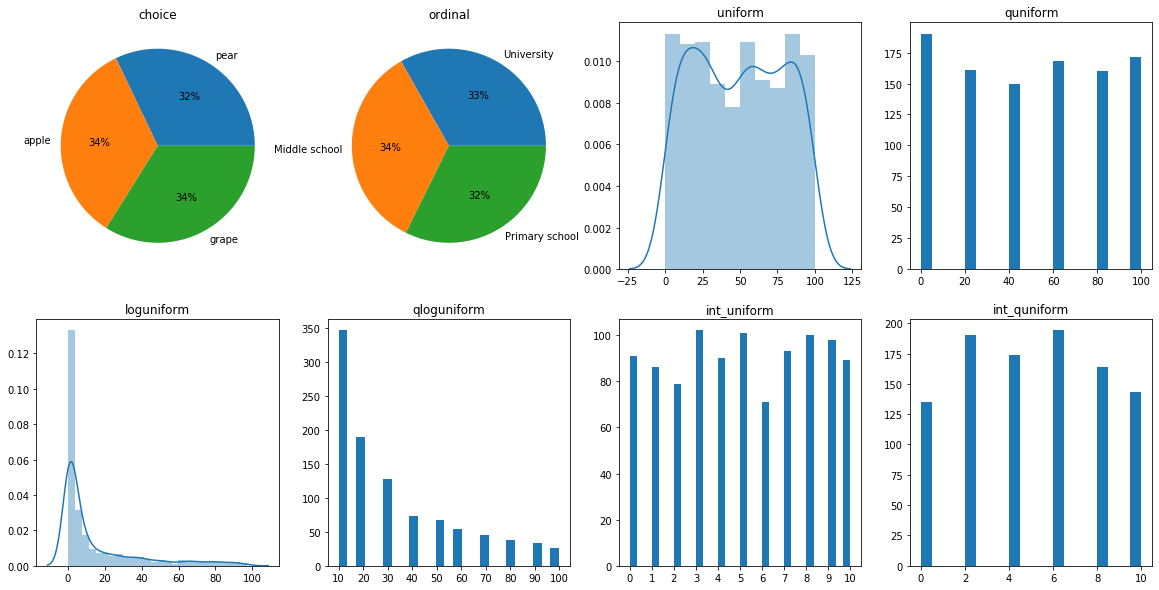

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(2,4,1)
plt.title("choice")
plt.pie(list(hp_choice_cnt.values()), labels=list(hp_choice_cnt.keys()), autopct='%1.0f%%');
plt.subplot(2,4,2)
plt.title("ordinal")
plt.pie(list(hp_ordinal_cnt.values()), labels=list(hp_ordinal_cnt.keys()), autopct='%1.0f%%');
plt.subplot(2,4,3)
plt.title("uniform")
sns.distplot(variables["hp_uniform"]);
plt.subplot(2,4,4)
plt.title("quniform")
plt.hist(variables["hp_quniform"], bins=20);
plt.subplot(2,4,5)
plt.title("loguniform")
sns.distplot(variables["hp_loguniform"]);
plt.subplot(2,4,6)
plt.title("qloguniform")
plt.hist(variables["hp_qloguniform"], bins=25);
plt.xticks(range(10,110,10));
plt.subplot(2,4,7)
plt.title("int_uniform")
plt.xticks(range(11));
plt.hist(variables["hp_int_uniform"], bins=30);
plt.subplot(2,4,8)
plt.title("int_quniform")
plt.hist(variables["hp_int_quniform"], bins=20);

In [14]:
def evaluate(config: dict):
    choice2numerical = dict(zip(["apple", "pear", "grape"], [3,2,4]))
    ordinal2numerical = dict(zip(["Primary school", "Middle school", "University"], [1, 2, 3]))
    interact1 = np.sin(config["hp_int_uniform"] - choice2numerical[config["hp_choice"]]) * np.sin(config["hp_int_quniform"] - ordinal2numerical[config["hp_ordinal"]])
    interact2 = np.sin(config["hp_uniform"] - choice2numerical[config["hp_choice"]]*10) * np.sin(config["hp_quniform"] - ordinal2numerical[config["hp_ordinal"]]*10)
    interact3 = ((interact1 - np.log(config["hp_loguniform"])) - 2) ** 2 - ((interact2 - np.log(config["hp_qloguniform"])) - 1) ** 2
    return interact3 

In [24]:
result = fmin(
    eval_func=evaluate, # 评价函数
    config_space=HDL,   # 配置空间
    optimizer="ETPE", # 优化器
    n_iterations=200    #  迭代数
)

100%|██████████| 200/200 [00:04<00:00, 49.02trial/s, best loss: -43.363]


In [25]:
result

+---------------------------------+
| HyperParameters | Optimal Value |
+-----------------+---------------+
| hp_choice       | pear          |
| hp_int_quniform | 10            |
| hp_int_uniform  | 9             |
| hp_loguniform   | 0.2459        |
| hp_ordinal      | University    |
| hp_qloguniform  | 100.0000      |
| hp_quniform     | 0.0000        |
| hp_uniform      | 100.0000      |
+-----------------+---------------+
| Optimal Loss    | -43.3633      |
+-----------------+---------------+
| Num Configs     | 200           |
+-----------------+---------------+

查看优化过程的拟合曲线：

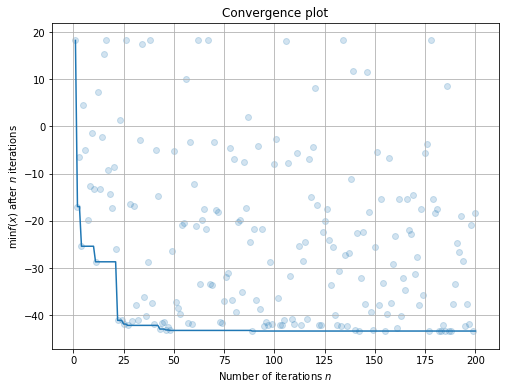

In [26]:
plt.rcParams['figure.figsize'] = (8, 6)
result.plot_convergence();